<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/Data_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#읽어오기.
import pandas as pd
customer_master = pd.read_csv('customer_master.csv')
item_master = pd.read_csv('item_master.csv')

customer_master.head()
item_master

transaction_1 = pd.read_csv('transaction_1.csv')
transaction_2 = pd.read_csv('transaction_2.csv')
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')

In [5]:

#연결하기. (pd.concat)
transaction = pd.concat([transaction_1,transaction_2],ignore_index = True)
transaction.info()

transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2],ignore_index = True)
transaction_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6786 entries, 0 to 6785
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  6786 non-null   object
 1   price           6786 non-null   int64 
 2   payment_date    6786 non-null   object
 3   customer_id     6786 non-null   object
dtypes: int64(1), object(3)
memory usage: 212.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   detail_id       7144 non-null   int64 
 1   transaction_id  7144 non-null   object
 2   item_id         7144 non-null   object
 3   quantity        7144 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 223.4+ KB


In [6]:
#연결 (merge -> 키값을 이용해 붙인다. )
join_data = pd.merge(transaction_detail,transaction[["transaction_id","payment_date","customer_id"]],
on = "transaction_id",how = "left")
join_data.head()
join_data = pd.merge(join_data,customer_master,on="customer_id",how = "left")
join_data.head()
join_data = pd.merge(join_data,item_master,on="item_id",how = "left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [7]:

#데이터 칼럼 생성
join_data["price"] = join_data["quantity"]*join_data["item_price"]
join_data[["quantity","item_price","price"]].head()
    #데이터 가공은 한번 실수하면 큰 에러가 발생한다.
print(join_data["price"].sum())
print(transaction["price"].sum())
#검산.
print(join_data["price"].sum()) == print(transaction["price"].sum())

971135000
971135000
971135000
971135000


True

In [8]:
#결손치는 결과에 영향을 끼치기 때문에 제거 혹은 따로 보관.
join_data.isnull().sum() #결손치가 있는지 체크.
join_data.describe()


,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [9]:

#월별로 데이터를 집계해보자.
join_data.dtypes #시계열 시간의 흐름에 따른 데이터 주로 주식,날씨
join_data["payment_date"]=pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date","payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [11]:
#날짜를 추출하고 그 날짜로 월별 집계.
join_data.groupby(["payment_month","item_name"]).sum()[["price","quantity"]]


price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [12]:
#가로로 출력.
pd.pivot_table(join_data,index = "item_name",columns = 'payment_month',
                values = ['price','quantity'],aggfunc = 'sum')

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

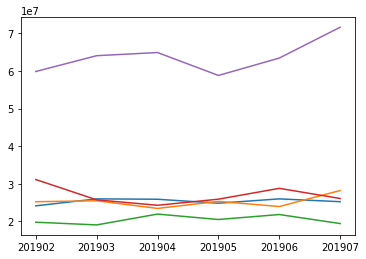

In [14]:
import matplotlib.pyplot as plt
#matplotlib inline
graph_data = pd.pivot_table(join_data, index = 'payment_month',columns = 'item_name', values = 'price', aggfunc ='sum')

plt.plot(list(graph_data.index),graph_data["PC-A"],label = 'PC-A')
plt.plot(list(graph_data.index),graph_data["PC-B"],label = 'PC-B')
plt.plot(list(graph_data.index),graph_data["PC-C"],label = 'PC-C')
plt.plot(list(graph_data.index),graph_data["PC-D"],label = 'PC-D')
plt.plot(list(graph_data.index),graph_data["PC-E"],label = 'PC-E')